In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ids-intrusion-csv/02-28-2018.csv
/kaggle/input/ids-intrusion-csv/03-01-2018.csv
/kaggle/input/ids-intrusion-csv/02-16-2018.csv
/kaggle/input/ids-intrusion-csv/02-15-2018.csv
/kaggle/input/ids-intrusion-csv/02-21-2018.csv
/kaggle/input/ids-intrusion-csv/03-02-2018.csv
/kaggle/input/ids-intrusion-csv/02-22-2018.csv
/kaggle/input/ids-intrusion-csv/02-20-2018.csv
/kaggle/input/ids-intrusion-csv/02-14-2018.csv
/kaggle/input/ids-intrusion-csv/02-23-2018.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
#from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
#from keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_dataset = pd.read_csv('../input/ids-intrusion-csv/02-14-2018.csv')
df_dataset

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [4]:
df_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [5]:
df_dataset["Label"].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

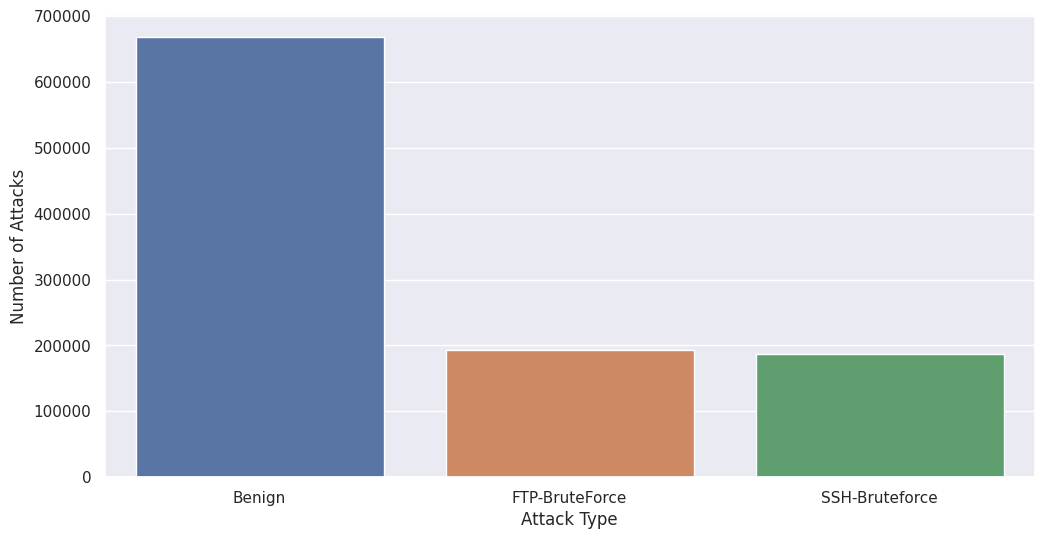

In [6]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Label', data=df_dataset)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.show()

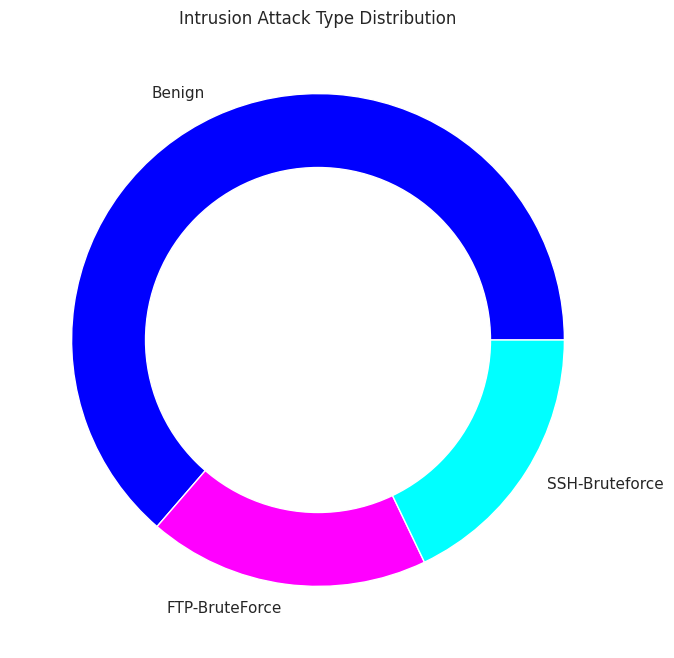

In [7]:
# viewing the distribution of intrusion attacks in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(df_dataset['Label'].value_counts(), labels=['Benign', 'FTP-BruteForce','SSH-Bruteforce'], colors=['blue', 'magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(circle)

In [8]:
# Remove erroneous 'Label' row
df_dataset.drop(df_dataset.loc[df_dataset["Label"] == "Label"].index, inplace=True)
df_dataset

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [9]:
df_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [10]:
df_dataset["Label"].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [11]:
# Remove erroneous 'Label' row
df_dataset.drop(df_dataset.loc[df_dataset["Label"] == "Label"].index, inplace=True)
df_dataset

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [12]:
df_dataset["Label"].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [13]:
print(df_dataset["Label"].value_counts()[['Benign']].sum())
print(df_dataset["Label"].value_counts()[['FTP-BruteForce']].sum())
print(df_dataset["Label"].value_counts()[['SSH-Bruteforce']].sum())

667626
193360
187589


In [14]:
#Checking "Protocol" values, and creating dummies based on the assumption that the Protocol values are categorical
df_dataset["Protocol"].unique()

array([ 0,  6, 17])

In [15]:
# Forcing them to be strings
df_dataset = df_dataset.astype({"Protocol": str})
df_dataset["Protocol"].unique()

array(['0', '6', '17'], dtype=object)

In [16]:
df_dataset = pd.get_dummies(df_dataset, columns=['Protocol'], drop_first=True)
df_dataset

,Dst Port,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,0.000000,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign,0,0
1,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,0.000000,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign,0,0
2,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,0.000000,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign,0,0
3,22,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,82.600000,...,0.0,0,0,0.0,0.000000,0,0,Benign,0,1
4,22,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,81.642857,...,0.0,0,0,0.0,0.000000,0,0,Benign,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,217.800000,...,0.0,0,0,0.0,0.000000,0,0,Benign,0,1
1048571,80,14/02/2018 10:53:33,117,2,0,0,0,0,0,0.000000,...,0.0,0,0,0.0,0.000000,0,0,Benign,0,1
1048572,80,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,0.000000,...,0.0,0,0,0.0,0.000000,0,0,Benign,0,1
1048573,80,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,0.000000,...,0.0,0,0,0.0,0.000000,0,0,Benign,0,1


In [17]:
# making Label column the last column again
df_dataset.insert(len(df_dataset.columns)-1, 'Label', df_dataset.pop('Label'))

In [18]:
columns_to_drop = [
    'Dst Port',
    'Timestamp',
    'Fwd PSH Flags',
    'Bwd PSH Flags',
    'Fwd URG Flags',
    'Bwd URG Flags',
    'Flow Byts/s',  # This field had np.inf values during training, as such was removed
    'Flow Pkts/s'  # This field had np.inf values during training, as such was removed
]

In [19]:
df_dataset.drop(columns=columns_to_drop, inplace=True)
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,0,Benign
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,0,Benign
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,0,Benign
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,10156986,5,5,1089,1923,587,0,217.800000,299.745225,1334,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
1048571,117,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
1048572,5095331,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
1048573,5235511,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign


In [20]:
df_dataset.dropna(inplace=True)
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,0,Benign
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,0,Benign
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,0,Benign
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,10156986,5,5,1089,1923,587,0,217.800000,299.745225,1334,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
1048571,117,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
1048572,5095331,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
1048573,5235511,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign


In [21]:
df_dataset.drop_duplicates(inplace=True)
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,0,Benign
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,0,Benign
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,0,Benign
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,10056041,5,5,1136,2668,578,0,227.200000,311.186761,1334,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
1048570,10156986,5,5,1089,1923,587,0,217.800000,299.745225,1334,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
1048572,5095331,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign
1048573,5235511,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,Benign


In [22]:
print(df_dataset["Label"].value_counts()[['Benign']].sum())
print(df_dataset["Label"].value_counts()[['FTP-BruteForce']].sum())
print(df_dataset["Label"].value_counts()[['SSH-Bruteforce']].sum())

525703
54
94048


In [23]:
df_dataset.replace(to_replace="Benign", value=0, inplace=True)
df_dataset.replace(to_replace="FTP-BruteForce", value=1, inplace=True)
df_dataset.replace(to_replace="SSH-Bruteforce", value=2, inplace=True)
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,0,0
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,0,0
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,0,0
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,10056041,5,5,1136,2668,578,0,227.200000,311.186761,1334,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
1048570,10156986,5,5,1089,1923,587,0,217.800000,299.745225,1334,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
1048572,5095331,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
1048573,5235511,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,0


In [24]:
print(df_dataset["Label"].value_counts()[[0]].sum())
print(df_dataset["Label"].value_counts()[[1]].sum())
print(df_dataset["Label"].value_counts()[[2]].sum())

525703
54
94048


In [25]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619805 entries, 0 to 1048574
Data columns (total 73 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      619805 non-null  int64  
 1   Tot Fwd Pkts       619805 non-null  int64  
 2   Tot Bwd Pkts       619805 non-null  int64  
 3   TotLen Fwd Pkts    619805 non-null  int64  
 4   TotLen Bwd Pkts    619805 non-null  int64  
 5   Fwd Pkt Len Max    619805 non-null  int64  
 6   Fwd Pkt Len Min    619805 non-null  int64  
 7   Fwd Pkt Len Mean   619805 non-null  float64
 8   Fwd Pkt Len Std    619805 non-null  float64
 9   Bwd Pkt Len Max    619805 non-null  int64  
 10  Bwd Pkt Len Min    619805 non-null  int64  
 11  Bwd Pkt Len Mean   619805 non-null  float64
 12  Bwd Pkt Len Std    619805 non-null  float64
 13  Flow IAT Mean      619805 non-null  float64
 14  Flow IAT Std       619805 non-null  float64
 15  Flow IAT Max       619805 non-null  int64  
 16  F

In [26]:
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,0,0
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,0,0
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,0,0
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,10056041,5,5,1136,2668,578,0,227.200000,311.186761,1334,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
1048570,10156986,5,5,1089,1923,587,0,217.800000,299.745225,1334,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
1048572,5095331,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
1048573,5235511,3,1,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.000000,0,0,0,1,0


In [27]:
from sklearn.model_selection import GridSearchCV, train_test_split
RANDOM_STATE_SEED = 420

In [28]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

In [29]:
df_1 = df_dataset[df_dataset.Label==0]
df_2 = df_dataset[df_dataset.Label==1]
df_3 = df_dataset[df_dataset.Label==2]
print(len(df_1),len(df_2),len(df_3))

525703 54 94048


In [30]:
from sklearn.utils import resample
df_2_upsampled = resample(df_2, replace=True, n_samples=len(df_1))  
df_3_upsampled = resample(df_3, replace=True, n_samples=len(df_1)) 
df_balanced = pd.concat([df_1, df_2_upsampled,df_3_upsampled])

In [31]:
df_dataset = df_balanced
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,0,0
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,0,0
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,0,0
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319497,375292,24,20,1912,2665,640,0,79.666667,133.833988,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,2
256025,338364,21,22,1912,2665,640,0,91.047619,139.679088,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,2
196187,380871,22,22,1912,2665,640,0,86.909091,137.688022,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,2
315811,346633,22,22,1912,2665,640,0,86.909091,137.688022,976,...,0.0,0,0,0.0,0.000000,0,0,0,1,2


In [32]:
train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)
target_train = train['Label']
target_test = test['Label']
target_train.unique(), target_test.unique()

(array([2, 0, 1]), array([2, 0, 1]))

In [33]:
test.shape

(473133, 73)

In [34]:
y_train = to_categorical(target_train, num_classes=3)
y_test = to_categorical(target_test, num_classes=3)
# making train & test splits
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = train.iloc[:, :-1].values
X_test = test.iloc[:, :-1].values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[9.99824398e-01, 4.10637466e-03, 2.40174672e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99824491e-01, 4.49745796e-03, 2.18340611e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99824494e-01, 4.10637466e-03, 2.40174672e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99824507e-01, 4.10637466e-03, 2.18340611e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99823924e-01, 0.00000000e+00, 1.09170306e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99832104e-01, 9.77708252e-04, 4.36681223e-04, ...,
        6.75887987e-04, 0.00000000e+00, 1.00000000e+00]])

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1103976, 72)
(473133, 72)
(1103976, 3)
(473133, 3)


In [36]:
import numpy as np

X_train = np.asarray(X_train).astype(np.float32)
#y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
#y_test = np.asarray(X_test).astype(np.float32)

In [37]:
print("Full dataset:\n")
print("Benign: " + str(df_dataset["Label"].value_counts()[[0]].sum()))
print("FTP: " + str(df_dataset["Label"].value_counts()[[1]].sum()))
print("SSH: " + str(train["Label"].value_counts()[[2]].sum()))

print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("FTP: " + str(train["Label"].value_counts()[[1]].sum()))
print("SSH: " + str(train["Label"].value_counts()[[2]].sum()))

print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("FTP: " + str(test["Label"].value_counts()[[1]].sum()))
print("SSH: " + str(train["Label"].value_counts()[[2]].sum()))

Full dataset:

Benign: 525703
FTP: 525703
SSH: 367598
---------------
Training set:

Benign: 368481
FTP: 367897
SSH: 367598
---------------
Test set:

Benign: 157222
FTP: 157806
SSH: 367598


In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1103976, 72)
(473133, 72)
(1103976, 3)
(473133, 3)


In [39]:
import tensorflow as tf

In [40]:
#rbm model
class RBM(tf.keras.Model):
    def __init__(self,n_hidden,n_visible=72,learning_rate=0.01, momentum=0.95):
        super(RBM, self).__init__()
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.W = self.add_weight(name='W', shape=(n_visible, n_hidden), initializer='uniform', trainable=True)
        self.hb = self.add_weight(name='hb', shape=(n_hidden,), initializer='zeros', trainable=True)
        self.vb = self.add_weight(name='vb', shape=(n_visible,), initializer='zeros', trainable=True)

    def call(self, inputs):
        hidden_prob = tf.sigmoid(tf.matmul(inputs, self.W) + self.hb)
        hidden_state = tf.dtypes.cast(tf.random.uniform(tf.shape(hidden_prob)) < hidden_prob, tf.float32)
        visible_prob = tf.sigmoid(tf.matmul(hidden_state, tf.transpose(self.W)) + self.vb)
        return visible_prob

    def sample_h_given_v(self, v):
        return tf.sigmoid(tf.matmul(v, self.W) + self.hb)

    def sample_v_given_h(self, h):
        return tf.sigmoid(tf.matmul(h, tf.transpose(self.W)) + self.vb)

    def contrastive_divergence(self, input_data, k=1):
        v0 = input_data
        hk = self.sample_h_given_v(v0)
        for i in range(k):
            vk = self.sample_v_given_h(hk)
            hk = self.sample_h_given_v(vk)
        positive_grad = tf.matmul(tf.transpose(v0), hk)
        negative_grad = tf.matmul(tf.transpose(vk), hk)
        W_update = self.learning_rate * (positive_grad - negative_grad) / tf.dtypes.cast(tf.shape(input_data)[0], tf.float32)
        hb_update = tf.reduce_mean((hk - self.sample_h_given_v(vk)), axis=0) * self.learning_rate
        vb_update = tf.reduce_mean((v0 - vk), axis=0) * self.learning_rate
        return W_update, hb_update, vb_update

In [41]:
rbm_model_1 = RBM(n_hidden=64)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
dataset = tf.data.Dataset.from_tensor_slices(X_train)
epochs = 10
batch_size = 1024
for epoch in range(epochs):
    for batch in dataset.batch(batch_size):
        with tf.GradientTape() as tape:
            positive_grad, negative_grad, _ = rbm_model_1.contrastive_divergence(batch)
            reconstruction_error = mse_loss(batch, rbm_model_1(batch))
            loss = reconstruction_error
        gradients = tape.gradient(loss, rbm_model_1.trainable_variables)
        optimizer.apply_gradients(zip(gradients, rbm_model_1.trainable_variables))
    print(loss)

tf.Tensor(0.0037906286, shape=(), dtype=float32)
tf.Tensor(0.0031424335, shape=(), dtype=float32)
tf.Tensor(0.0030225108, shape=(), dtype=float32)
tf.Tensor(0.0025977185, shape=(), dtype=float32)
tf.Tensor(0.002475461, shape=(), dtype=float32)
tf.Tensor(0.0025188255, shape=(), dtype=float32)
tf.Tensor(0.0021641366, shape=(), dtype=float32)
tf.Tensor(0.0021993767, shape=(), dtype=float32)
tf.Tensor(0.0021986815, shape=(), dtype=float32)
tf.Tensor(0.0020751504, shape=(), dtype=float32)


In [42]:
rbm_model_2 = RBM(n_hidden=128,n_visible=64)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
dataset = tf.data.Dataset.from_tensor_slices(X_train)
epochs = 10
batch_size = 1024
for epoch in range(epochs):
    for batch in dataset.batch(batch_size):
        with tf.GradientTape() as tape:
            positive_grad, negative_grad, _ = rbm_model_2.contrastive_divergence(rbm_model_1.sample_h_given_v(batch))
            reconstruction_error = mse_loss(rbm_model_1.sample_h_given_v(batch), rbm_model_2(rbm_model_1.sample_h_given_v(batch)))
            loss = reconstruction_error
        gradients = tape.gradient(loss, rbm_model_2.trainable_variables)
        optimizer.apply_gradients(zip(gradients, rbm_model_2.trainable_variables))
    print(loss)

tf.Tensor(0.0044122497, shape=(), dtype=float32)
tf.Tensor(0.0037144828, shape=(), dtype=float32)
tf.Tensor(0.0032920416, shape=(), dtype=float32)
tf.Tensor(0.0028502797, shape=(), dtype=float32)
tf.Tensor(0.0025843882, shape=(), dtype=float32)
tf.Tensor(0.0026902268, shape=(), dtype=float32)
tf.Tensor(0.002571545, shape=(), dtype=float32)
tf.Tensor(0.0022384715, shape=(), dtype=float32)
tf.Tensor(0.0022660359, shape=(), dtype=float32)
tf.Tensor(0.0025862157, shape=(), dtype=float32)


In [43]:
rbm_model_3 = RBM(n_hidden=256,n_visible=128)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
dataset = tf.data.Dataset.from_tensor_slices(X_train)
epochs = 10
batch_size = 1024
for epoch in range(epochs):
    for batch in dataset.batch(batch_size):
        with tf.GradientTape() as tape:
            positive_grad, negative_grad, _ = rbm_model_3.contrastive_divergence(rbm_model_2.sample_h_given_v(rbm_model_1.sample_h_given_v(batch)))
            reconstruction_error = mse_loss(rbm_model_2.sample_h_given_v(rbm_model_1.sample_h_given_v(batch)), rbm_model_3(rbm_model_2.sample_h_given_v(rbm_model_1.sample_h_given_v(batch))))
            loss = reconstruction_error
        gradients = tape.gradient(loss, rbm_model_3.trainable_variables)
        optimizer.apply_gradients(zip(gradients, rbm_model_3.trainable_variables))
    print(loss)

tf.Tensor(0.0032139064, shape=(), dtype=float32)
tf.Tensor(0.0024115844, shape=(), dtype=float32)
tf.Tensor(0.0022752308, shape=(), dtype=float32)
tf.Tensor(0.0022196355, shape=(), dtype=float32)
tf.Tensor(0.0021878663, shape=(), dtype=float32)
tf.Tensor(0.0021739118, shape=(), dtype=float32)
tf.Tensor(0.0020143068, shape=(), dtype=float32)
tf.Tensor(0.0020691382, shape=(), dtype=float32)
tf.Tensor(0.0020330835, shape=(), dtype=float32)
tf.Tensor(0.0019444133, shape=(), dtype=float32)


In [44]:
# rbm1 = RBM(n_visible=72, n_hidden=256, learning_rate=0.001, momentum=0.95)
# rbm2 = RBM(n_visible=252, n_hidden=128, learning_rate=0.001, momentum=0.95)
# rbm3 = RBM(n_visible=128, n_hidden=64, learning_rate=0.001, momentum=0.95)

In [45]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

In [46]:
inputs = tf.keras.Input(shape=(72,))
hidden_layer1 = rbm_model_1.sample_h_given_v(inputs)
x1 = Dense(128,activation="relu")(hidden_layer1)
hidden_layer2 = rbm_model_2.sample_h_given_v(hidden_layer1)
x2 = Dense(128,activation="relu")(hidden_layer2)
hidden_layer3 =rbm_model_3.sample_h_given_v(hidden_layer2)
x3 = Dense(128,activation="relu")(hidden_layer3)
outputs = Dense(3, activation='softmax')(tf.keras.layers.Concatenate(axis=1)([x1,x2,x3]))
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [47]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.0001)

In [48]:
adam = keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)

model.compile( loss = "categorical_crossentropy", 
               optimizer = adam, 
               metrics=['accuracy']
             )

In [49]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 72)]         0           []                               
                                                                                                  
 tf.linalg.matmul (TFOpLambda)  (None, 64)           0           ['input_1[0][0]']                
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 64)          0           ['tf.linalg.matmul[0][0]']       
 da)                                                                                              
                                                                                                  
 tf.math.sigmoid (TFOpLambda)   (None, 64)           0           ['tf.__operators__.add[0][0]'

In [50]:
history=model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_data=(X_test, y_test),
        callbacks=[early_stop, reduce_lr])

Epoch 1/10
1079/1079 [==============================] - 14s 12ms/step - loss: 0.3396 - accuracy: 0.9151 - val_loss: 0.1699 - val_accuracy: 0.9409 - lr: 0.0010
Epoch 2/10
1079/1079 [==============================] - 13s 12ms/step - loss: 0.1320 - accuracy: 0.9506 - val_loss: 0.1013 - val_accuracy: 0.9608 - lr: 0.0010
Epoch 3/10
1079/1079 [==============================] - 13s 12ms/step - loss: 0.0802 - accuracy: 0.9697 - val_loss: 0.0653 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 4/10
1079/1079 [==============================] - 13s 12ms/step - loss: 0.0523 - accuracy: 0.9892 - val_loss: 0.0417 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 5/10
1079/1079 [==============================] - 13s 12ms/step - loss: 0.0366 - accuracy: 0.9944 - val_loss: 0.0329 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 6/10
1079/1079 [==============================] - 13s 12ms/step - loss: 0.0271 - accuracy: 0.9953 - val_loss: 0.0251 - val_accuracy: 0.9953 - lr: 0.0010
Epoch 7/10
1079/1079 [========================

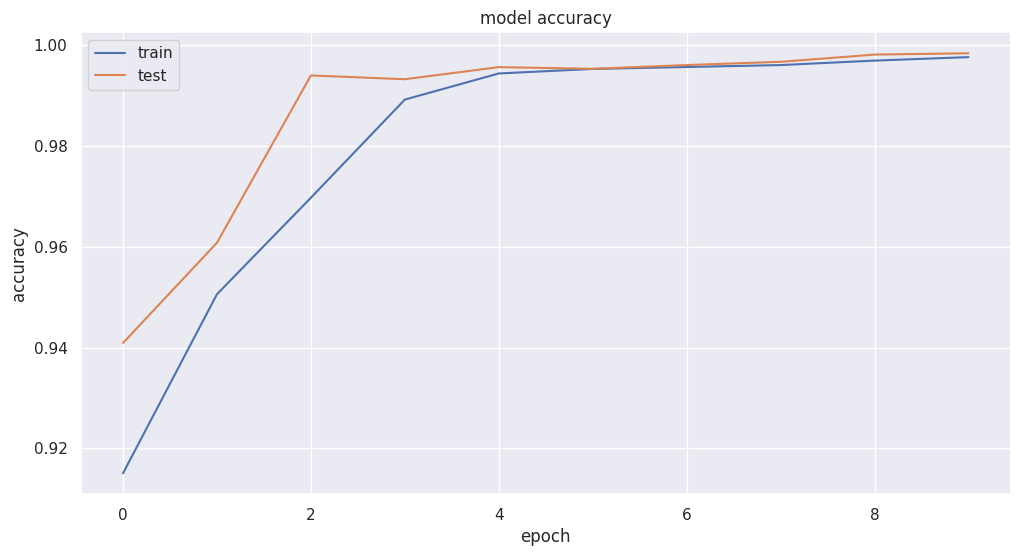

In [51]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

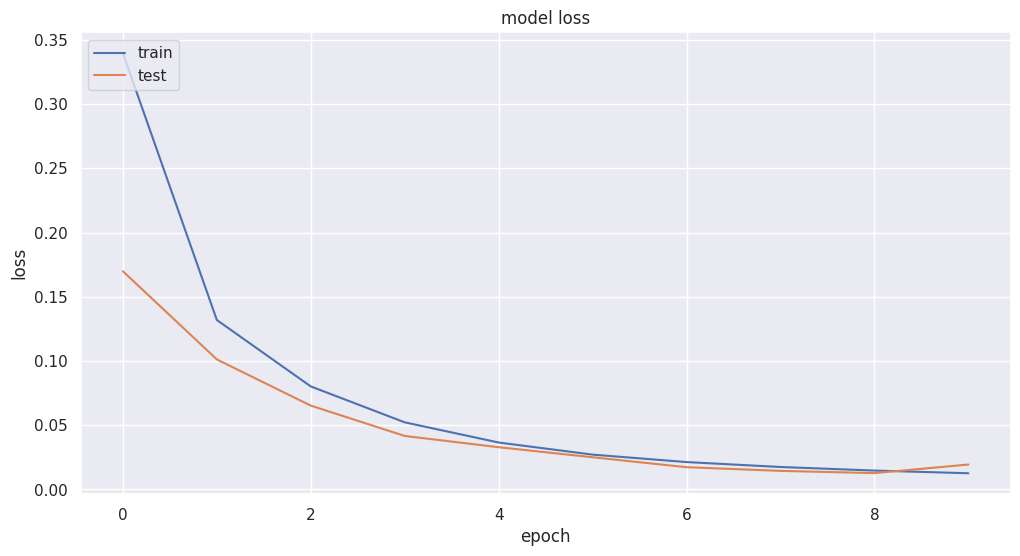

In [52]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
y_pred =np.argmax(model.predict(X_test),axis=1)

14786/14786 [==============================] - 23s 2ms/step


In [54]:
y_test =np.argmax(y_test,axis=1)
y_test

array([2, 2, 2, ..., 2, 1, 0])

In [55]:
y_pred

array([2, 2, 2, ..., 2, 1, 0])

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9984021406243064

In [57]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix

array([[156817,    215,    190],
       [     0, 157806,      0],
       [   343,      8, 157754]])

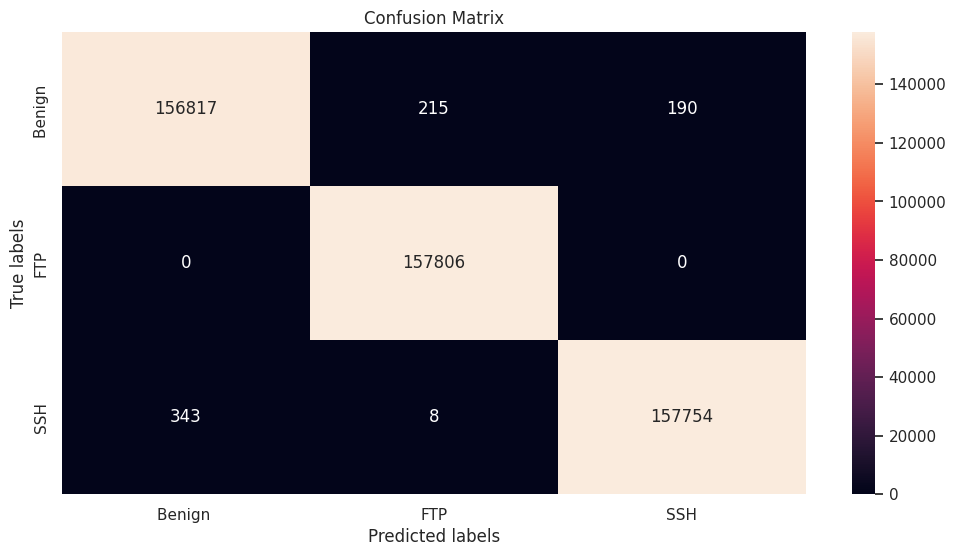

In [58]:
import seaborn as sns
T5_lables = ['Benign ','FTP','SSH']  
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.998402


In [60]:
print("F1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

F1 Score :  0.9984021406243064


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1396: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1396: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



Precision Score :  0.9984021406243064
Recall Score :  0.9984021406243064


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1396: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

